# Build your own CNN
- Recap

- Data prep

- Building a first CNN
    - Demo
    - Your turn

- Dropout
    - Demo
    - Your turn

Recap poll:<br>
https://forms.gle/bU2w2YMn3p36Dy1S6

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras.models import Sequential, Model
from keras.layers import Dense, Conv2D, Flatten, MaxPool2D, MaxPooling2D

from sklearn.model_selection import train_test_split

### Data ingestion and formatting

In [2]:
from keras.datasets import mnist
#download mnist data and split into train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train,test_size=.2,random_state=42)

In [3]:
X_train.shape

(48000, 28, 28)

### reshape data to fit model

In [4]:
# the models expects information about the channels used
# reshape data to fit model
X_train = X_train.reshape(-1,28,28,1)
X_val = X_val.reshape(-1,28,28,1)
X_test = X_test.reshape(-1,28,28,1)

In [5]:
X_train.shape

(48000, 28, 28, 1)

### EDA

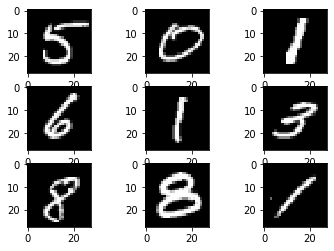

In [6]:
for i in range(0, 9):
    plt.subplot(330 + 1 + i)
    plt.imshow(X_train[i].reshape(28, 28), cmap=plt.get_cmap('gray'))
plt.show()

In [7]:
y_train[:10]

array([5, 0, 1, 6, 1, 3, 8, 8, 1, 8], dtype=uint8)

### one-hot encode target column

In [8]:
from keras.utils import to_categorical

# one-hot encode target column
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)

In [9]:
y_train.shape

(48000, 10)

In [10]:
y_train[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]], dtype=float32)

In [11]:
for i in range(0, 9):
    print(y_train[i])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


# CNNs best practices

## Convolutional layers
Use small kernels/filters:
 - 3x3 or 5x5<br>
 
Use small strides:
 
 - 1 or 2 respectively for the above kernels
 - In general: Strides = (Kernel size -1)/2
 
 #### Discuss:
 How does the shape of our data change after applying a 3x3 convolutional layer with stride 1?
 
 
## Pooling layers
Downsampling of Convolutional output<br>

Use small kernels/filters:
 - 2x2
 - Sometimes you may want to use 3x3 but larger tends to reduce performance heavily<br>
 
Use small strides:
 
 - 2
 - Very rarely 3
 
 #### Discuss:
 By how much do we reduce our data size when we perform a 2x2 pooling of stride 2?


## Flattening layers
- Transform multidimensional data into in the NN into an array that can be used by a Dense Layer
- The nexus between your non-fully-connected and fully-connected layers

# Demo

In [45]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPool2D, MaxPooling2D, Dropout

In [46]:
# Intitialise your NN
model = Sequential()
# Add a convolutional layer
model.add(Conv2D(32,kernel_size=(3,3),strides=1,input_shape=(28,28,1),activation='relu'))
# Add a pooling layer
model.add(MaxPool2D(pool_size=(2,2),strides=2))
# Add a flattening layer
model.add(Flatten())
# Add a dense layer suitable for our problem
model.add(Dense(10,activation='softmax'))
# Compile your CNN
model.compile(optimizer='adam',metrics=['accuracy'],loss='categorical_crossentropy')
# Show summary and compare with your partner
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 10)                54090     
Total params: 54,410
Trainable params: 54,410
Non-trainable params: 0
_________________________________________________________________


In [47]:
# Fit / Validate your model (Keep Epochs to 5 for our example)
model.fit(X_train,y_train,batch_size=1000,epochs=5,validation_data=(X_val, y_val))

Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 9s 184us/step - loss: 4.6905 - acc: 0.6832 - val_loss: 3.6057 - val_acc: 0.7646
Epoch 2/5
48000/48000 [==============================] - 8s 169us/step - loss: 3.4430 - acc: 0.7762 - val_loss: 3.3533 - val_acc: 0.7833
Epoch 3/5
48000/48000 [==============================] - 8s 170us/step - loss: 3.2790 - acc: 0.7889 - val_loss: 3.2715 - val_acc: 0.7885
Epoch 4/5
48000/48000 [==============================] - 8s 166us/step - loss: 2.6426 - acc: 0.8239 - val_loss: 1.9107 - val_acc: 0.8673
Epoch 5/5
48000/48000 [==============================] - 8s 168us/step - loss: 1.7710 - acc: 0.8813 - val_loss: 1.7793 - val_acc: 0.8792


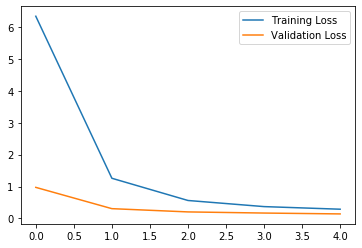

In [48]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend()

# Wait what?!!

# [But mum... Why is the training loss higher than the validation loss???!!!](https://keras.io/getting-started/faq/#why-is-the-training-loss-much-higher-than-the-testing-loss)

# Looking at outputs

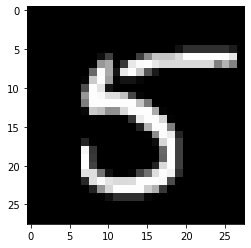

In [86]:
plt.imshow(X_train[0].reshape(28, 28), cmap=plt.get_cmap('gray'))

In [44]:
model.predict(X_train[:1])

array([[1.8189826e-07, 1.4788710e-06, 3.2810988e-03, 1.1328976e-02,
        2.3360308e-06, 3.0773208e-06, 7.1378039e-08, 9.9984741e+01,
        1.3132958e-04, 5.2517763e-04]], dtype=float32)

In [84]:
intermediate_layer_model = Model(inputs=model.input, outputs=model.get_layer('conv2d_20').output)
intermediate_output = intermediate_layer_model.predict(X_train)

In [85]:
intermediate_output[0].T.shape

(32, 26, 26)

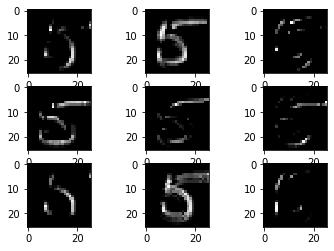

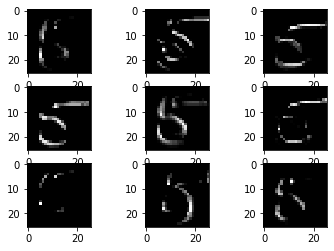

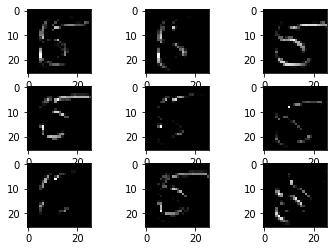

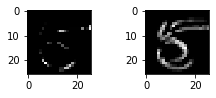

In [87]:
for i in range(0,9):
    plt.subplot(330 + 1 + i)
    plt.imshow(intermediate_output[0].T[i].T, cmap=plt.get_cmap('gray'))
plt.show()
for i in range(10,19):
    plt.subplot(330 + 1 + i-10)
    plt.imshow(intermediate_output[0].T[i].T, cmap=plt.get_cmap('gray'))
plt.show()
for i in range(20,29):
    plt.subplot(330 + 1 + i-20)
    plt.imshow(intermediate_output[0].T[i].T, cmap=plt.get_cmap('gray'))
plt.show()
for i in range(30,32):
    plt.subplot(330 + 1 + i-30)
    plt.imshow(intermediate_output[0].T[i].T, cmap=plt.get_cmap('gray'))
plt.show()

## 1 Convolutional layer + 1 Pooling layer

In [17]:
#create model
model = Sequential()

#add model layers
model.add(Conv2D(64, kernel_size=3,strides=1, activation='relu', input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=2,strides=2))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

#compile model using accuracy to measure model performance
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 10816)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                108170    
Total params: 108,810
Trainable params: 108,810
Non-trainable params: 0
_________________________________________________________________


In [18]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val),
                    epochs=5, verbose=1, batch_size=1000)

Train on 48000 samples, validate on 10000 samples
Epoch 1/5
48000/48000 [==============================] - 20s 410us/step - loss: 7.3062 - acc: 0.5357 - val_loss: 6.6344 - val_acc: 0.5840
Epoch 2/5
48000/48000 [==============================] - 20s 413us/step - loss: 6.5167 - acc: 0.5922 - val_loss: 6.5133 - val_acc: 0.5925
Epoch 3/5
48000/48000 [==============================] - 20s 409us/step - loss: 6.4162 - acc: 0.5994 - val_loss: 6.4391 - val_acc: 0.5977
Epoch 4/5
48000/48000 [==============================] - 20s 416us/step - loss: 6.3551 - acc: 0.6033 - val_loss: 6.3942 - val_acc: 0.6006
Epoch 5/5
48000/48000 [==============================] - 20s 410us/step - loss: 6.3125 - acc: 0.6065 - val_loss: 6.3579 - val_acc: 0.6035


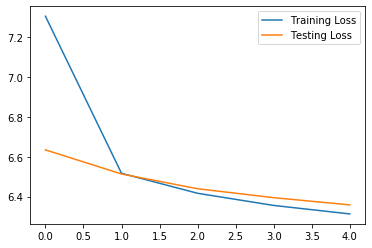

In [19]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend()

# Now build your CNN

#### Person A:
Output layer one 64 neurons, kernel 3x3<br>
Layer two kernel 2x2
#### Person B:
Output layer one 64 neurons, kernel 5x5<br>
Layer two kernel 2x2

In [20]:
# Intitialise your NN
# Add a convolutional layer
# Add a pooling layer
# Add a flattening layer
# Add a dense layer suitable for our problem
# Compile your CNN
# Show summary and compare with your partner

In [21]:
# Fit / Validate your model (Keep Epochs to 5 for our example)

## 2 Convolutional layer + 2 Pooling layer

In [22]:
#create model
model = Sequential()

#add model layers
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=2,strides=2))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

#compile model using accuracy to measure model performance
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 32)        18464     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                8010      
Total params: 27,114
Trainable params: 27,114
Non-trainable params: 0
_________________________________________________________________


In [23]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val),
                    epochs=5, verbose=1, batch_size=1000)

Train on 48000 samples, validate on 10000 samples
Epoch 1/5
48000/48000 [==============================] - 30s 615us/step - loss: 4.6050 - acc: 0.6482 - val_loss: 2.1926 - val_acc: 0.8297
Epoch 2/5
48000/48000 [==============================] - 29s 614us/step - loss: 2.0586 - acc: 0.8450 - val_loss: 1.9023 - val_acc: 0.8599
Epoch 3/5
48000/48000 [==============================] - 30s 628us/step - loss: 1.8827 - acc: 0.8609 - val_loss: 1.8112 - val_acc: 0.8683
Epoch 4/5
48000/48000 [==============================] - 29s 614us/step - loss: 1.8024 - acc: 0.8698 - val_loss: 1.7552 - val_acc: 0.8752
Epoch 5/5
48000/48000 [==============================] - 29s 612us/step - loss: 1.7569 - acc: 0.8752 - val_loss: 1.7339 - val_acc: 0.8762


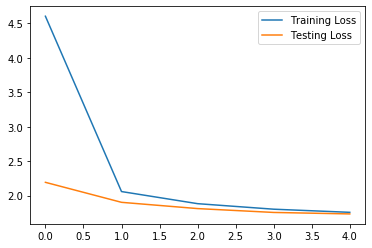

In [24]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend()

## 2 Convolutional layers

In [25]:
#create model
model = Sequential()

#add model layers
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

#compile model using accuracy to measure model performance
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 24, 24, 32)        18464     
_________________________________________________________________
flatten_4 (Flatten)          (None, 18432)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                184330    
Total params: 203,434
Trainable params: 203,434
Non-trainable params: 0
_________________________________________________________________


In [26]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val),
                    epochs=5, verbose=1, batch_size=1000)

Train on 48000 samples, validate on 10000 samples
Epoch 1/5
48000/48000 [==============================] - 58s 1ms/step - loss: 8.3100 - acc: 0.4767 - val_loss: 8.0733 - val_acc: 0.4967
Epoch 2/5
48000/48000 [==============================] - 56s 1ms/step - loss: 7.9346 - acc: 0.5025 - val_loss: 6.2765 - val_acc: 0.5341
Epoch 3/5
48000/48000 [==============================] - 57s 1ms/step - loss: 0.8932 - acc: 0.8234 - val_loss: 0.1459 - val_acc: 0.9597
Epoch 4/5
48000/48000 [==============================] - 57s 1ms/step - loss: 0.1013 - acc: 0.9700 - val_loss: 0.0943 - val_acc: 0.9725
Epoch 5/5
48000/48000 [==============================] - 56s 1ms/step - loss: 0.0564 - acc: 0.9830 - val_loss: 0.0826 - val_acc: 0.9770


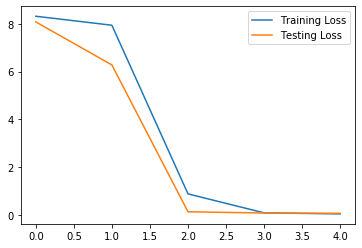

In [27]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend()

## 7 Convolutional layers

### Deeper networks tend to generalise better

In [28]:
num_classes = 10

model = Sequential()
model.add(Conv2D(128, kernel_size=(5, 5), strides=(1, 1),
                 activation='relu',input_shape=(28,28,1)))
model.add(Conv2D(128, (5, 5), activation='relu'))
model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(Conv2D(32, (5, 5), activation='relu'))
model.add(Conv2D(32, (5, 5), activation='relu'))
model.add(Conv2D(16, (3, 3), activation='relu'))
# model.add(Conv2D(16, (3, 3), activation='relu'))
# model.add(Conv2D(8, (3, 3), activation='relu'))
# model.add(Conv2D(8, (3, 3), activation='relu'))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

#compile model using accuracy to measure model performance
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 24, 24, 128)       3328      
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 20, 20, 128)       409728    
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 16, 16, 64)        204864    
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 12, 12, 64)        102464    
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 8, 8, 32)          51232     
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 4, 4, 32)          25632     
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 2, 2, 16)          4624      
__________

In [29]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val),epochs=5, verbose=1, batch_size=1000)

Train on 48000 samples, validate on 10000 samples
Epoch 1/5
48000/48000 [==============================] - 532s 11ms/step - loss: 1.6115 - acc: 0.4671 - val_loss: 0.6771 - val_acc: 0.7848
Epoch 2/5
48000/48000 [==============================] - 535s 11ms/step - loss: 0.4220 - acc: 0.8735 - val_loss: 0.2908 - val_acc: 0.9158
Epoch 3/5
48000/48000 [==============================] - 547s 11ms/step - loss: 0.2025 - acc: 0.9406 - val_loss: 0.2000 - val_acc: 0.9373
Epoch 4/5
48000/48000 [==============================] - 562s 12ms/step - loss: 0.1397 - acc: 0.9587 - val_loss: 0.1021 - val_acc: 0.9689
Epoch 5/5
48000/48000 [==============================] - 563s 12ms/step - loss: 0.0995 - acc: 0.9705 - val_loss: 0.0832 - val_acc: 0.9757


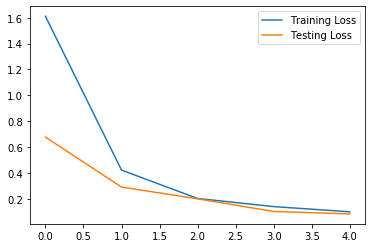

In [30]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend()

## Dropout layers
Use small dropout values:
 - 20-50%<br>
 
Can be used on the visible and hidden layers
 
 #### Discuss:
 How does the shape of our data change after applying a dropout layer?

In [35]:
#create model
model = Sequential()

#add model layers
model.add(Dropout(0.2, input_shape=(28,28,1)))
model.add(Conv2D(64, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))
model.add(Dropout(0.2))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

#compile model using accuracy to measure model performance
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout_5 (Dropout)          (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 11, 11, 32)        18464     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 5, 5, 32)          0         
__________

In [36]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val),epochs=5, verbose=1, batch_size=1000)

Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 35s 730us/step - loss: 6.3380 - acc: 0.5364 - val_loss: 0.9733 - val_acc: 0.8691
Epoch 2/5
48000/48000 [==============================] - 34s 710us/step - loss: 1.2585 - acc: 0.8430 - val_loss: 0.3058 - val_acc: 0.9253
Epoch 3/5
48000/48000 [==============================] - 34s 711us/step - loss: 0.5623 - acc: 0.8793 - val_loss: 0.2038 - val_acc: 0.9392
Epoch 4/5
48000/48000 [==============================] - 36s 753us/step - loss: 0.3702 - acc: 0.9020 - val_loss: 0.1682 - val_acc: 0.9500
Epoch 5/5
48000/48000 [==============================] - 34s 713us/step - loss: 0.2884 - acc: 0.9191 - val_loss: 0.1410 - val_acc: 0.9585


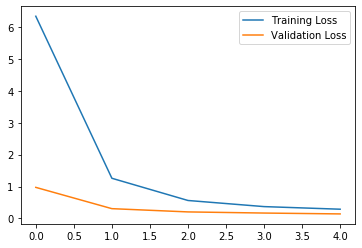

In [38]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend()